# Baseball Case Study


Project Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


In [3]:
from IPython.display import Image
Image(url="https://images.unsplash.com/flagged/photo-1571358607210-1691cb0ea07c?auto=format&fit=crop&q=80&w=1740&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D")

# Importing libraries and the dataset

In [4]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_bb= pd.read_csv(r"C:\Users\Premium\Downloads\baseball.csv")
df_bb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
df_bb.shape # to knw no of rows and colomns

(30, 17)

In [8]:
#To know the information about each column like the data type, etc we use the info() function.
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are No Null values present in the given dataset.

In [10]:
df_bb.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

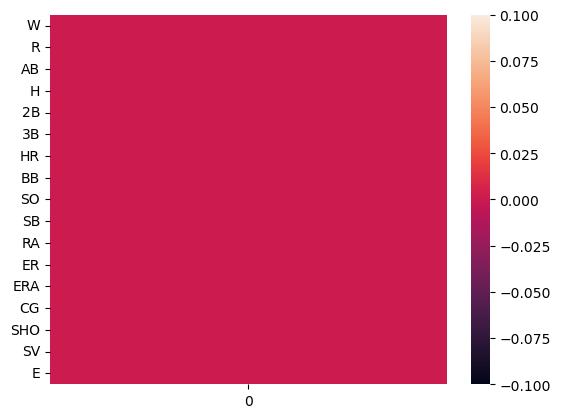

In [9]:
sns.heatmap(df_bb.isnull().sum().to_frame())

There is No need to change the datatype they are appropriate so we can skip the step of data conversion and also there are no null values so now we can perform data Visualization.

# Exploatory DataAnalysis

# Data Visualization

Visualizing the histogram of wins

Text(0.5, 1.0, 'histogram of wins')

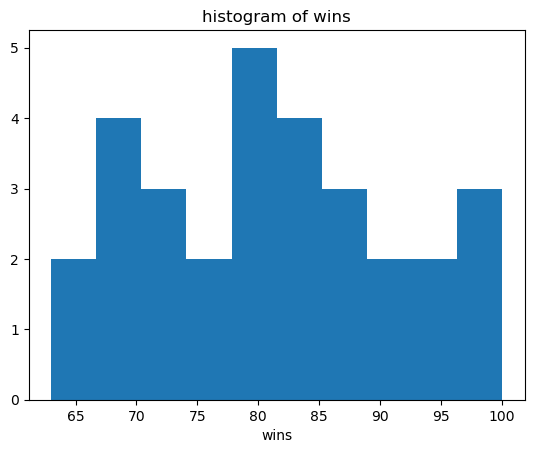

In [18]:
plt.hist(df_bb['W'])
plt.xlabel('wins')
plt.title('histogram of wins')

In [19]:
df_bb['W'].mean()  ## checking the avg wins

80.96666666666667

<AxesSubplot:xlabel='W', ylabel='R'>

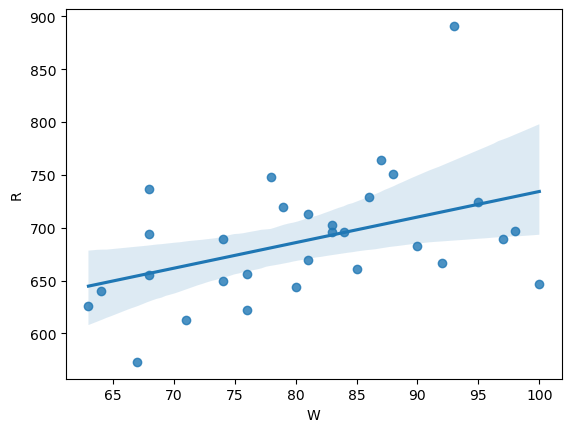

In [30]:
plt.subplot(1,1,1)
sns.regplot(x="W",y="R",data=df_bb)

The runs and Wins are linearly corelated and the outlier is present inbetween 850 and 900.

<AxesSubplot:ylabel='R'>

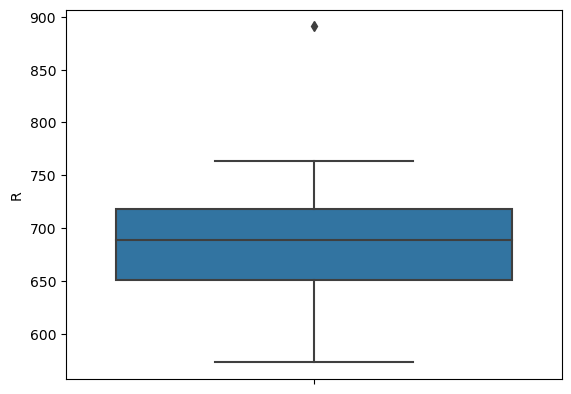

In [33]:
plt.subplot(1,1,1)
sns.boxplot(y="R",data=df_bb)

<AxesSubplot:xlabel='W', ylabel='H'>

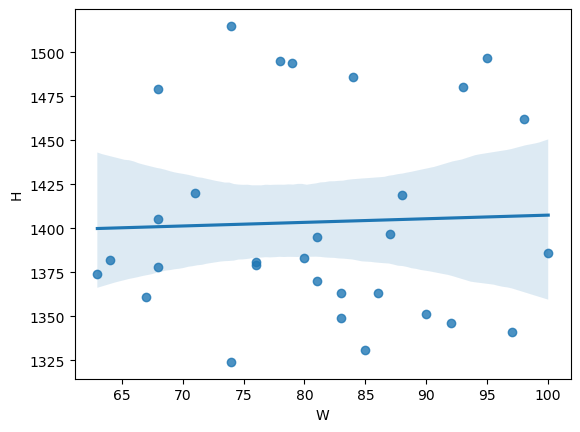

In [36]:
plt.subplot(1,1,1)
sns.regplot(x="W",y="H",data=df_bb)

<AxesSubplot:ylabel='H'>

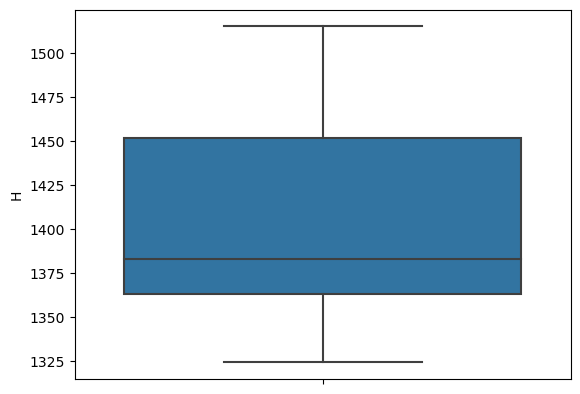

In [37]:
plt.subplot(1,1,1)
sns.boxplot(y="H",data=df_bb)

The Hits are very weekly related to winning with no outliers

<AxesSubplot:xlabel='W', ylabel='2B'>

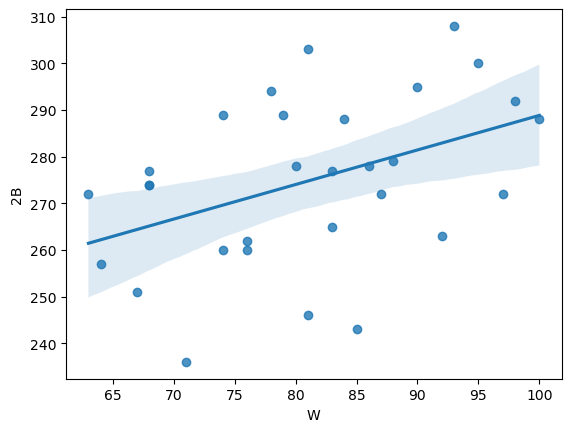

In [38]:
plt.subplot(1,1,1)
sns.regplot(x="W",y="2B",data=df_bb)

<AxesSubplot:ylabel='2B'>

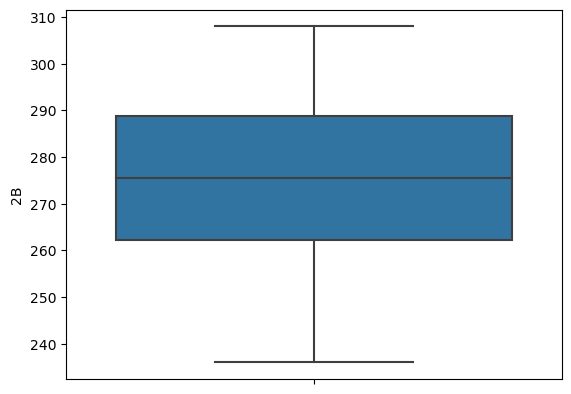

In [39]:
plt.subplot(1,1,1)
sns.boxplot(y="2B",data=df_bb)

The Doubles or a "two-bagger" or "two-base hit" are linearly related with Wins, with no outliers.

<AxesSubplot:xlabel='W', ylabel='RA'>

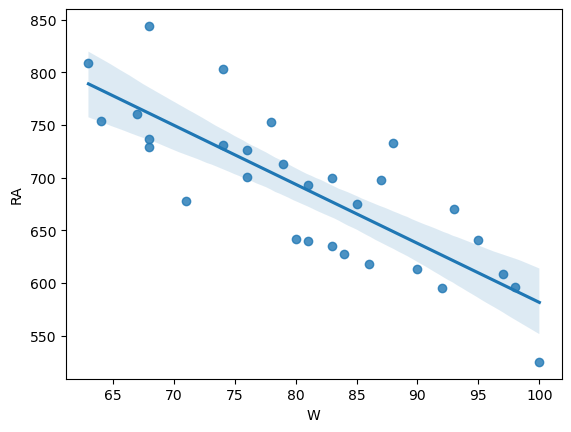

In [40]:
plt.subplot(1,1,1)
sns.regplot(x="W",y="RA",data=df_bb)

<AxesSubplot:ylabel='RA'>

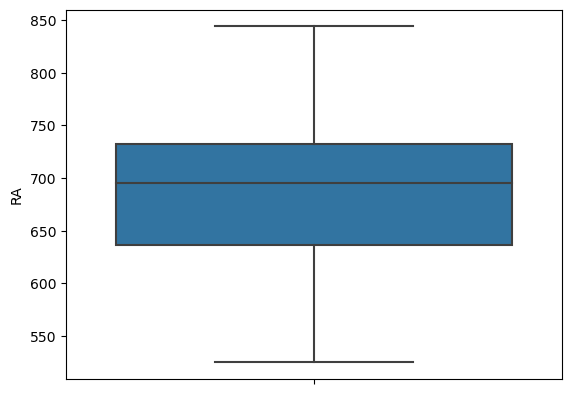

In [41]:
plt.subplot(1,1,1)
sns.boxplot(y="RA",data=df_bb)

Runs Average  is highly correlated to win with no outliers.

The Analysis:
    The number of runs, home runs, doubles,RunsAverage and Walks are highly positively linearly correlated.
    The remaining features have less to no linear correlation with no of Wins

# Statistical Analysis

In [35]:
df_bb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [42]:
df_bb['W'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [43]:
df_bb.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Text(0.5, 1.0, 'Correlation Factors Heat Map')

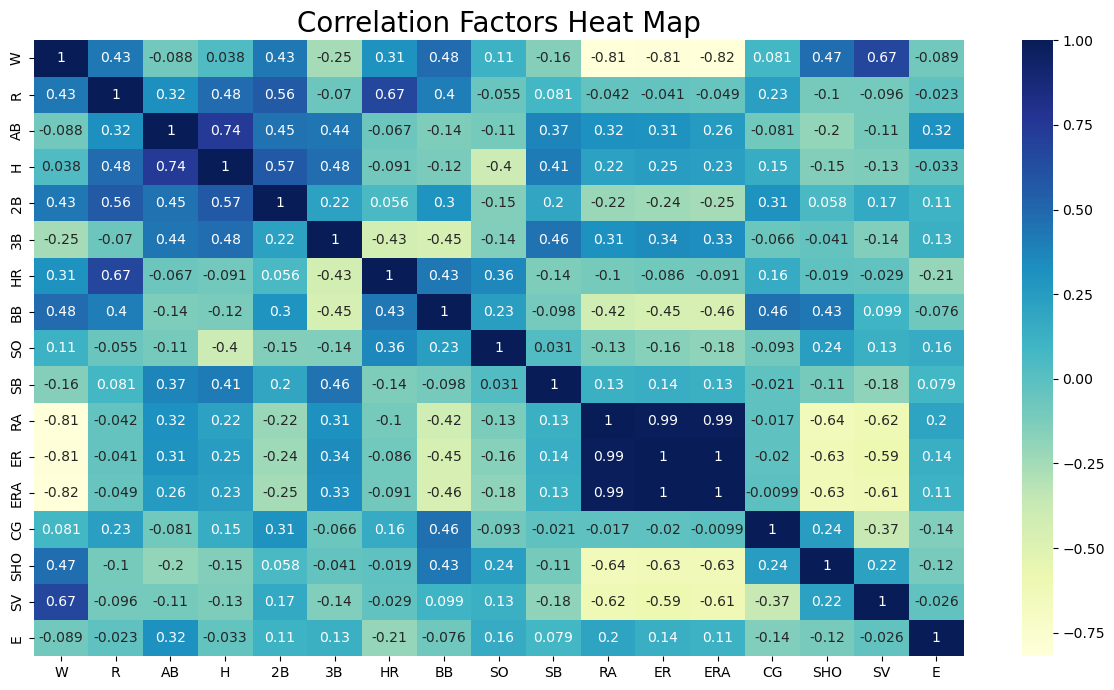

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(df_bb.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

we can see that RA ER,ERA are highly correlated with the wins.also R,SV,2B are also correlated with the wins.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [46]:
df_bb.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# Separating independent variable and target variable

In [47]:
x1=df_bb.drop('W',axis=1)
y1=df_bb['W']

In [48]:
x1.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [49]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x1)
df_new=pd.DataFrame(df_new,columns=x1.columns)

In [50]:
df_new.skew()

R      0.000000
AB     0.000000
H      0.000000
2B    -0.035315
3B    -0.072933
HR    -0.000065
BB    -0.007760
SO     0.041170
SB    -0.010455
RA    -0.008082
ER    -0.001940
ERA    0.001746
CG    -0.059785
SHO    0.006560
SV     0.000836
E      0.063909
dtype: float64

So we have removed all skewness

In [51]:
df_new.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.0,0.0,0.0,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.497425,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.0,0.0,0.0,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.257974,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,0.0,0.0,0.0,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.746906,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,0.0,0.0,0.0,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.113575,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,0.0,0.0,0.0,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.582654,1.520959,1.220103,0.251775,-1.095010,-0.532211


# Creating train test split¶

In [52]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [53]:
x=df_new
x.shape

(30, 16)

In [54]:
y=y1
y.shape

(30,)

In [55]:
y=y.values.reshape(-1,1)

In [56]:
y.shape

(30, 1)

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=52)

In [58]:
x_train.shape

(21, 16)

In [59]:
x_test.shape

(9, 16)

In [60]:
y_train.shape

(21, 1)

In [61]:
y_test.shape

(9, 1)

# Finding Best Algorithm using multiple models

In [69]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [70]:
lm=LinearRegression()
dtr=DecisionTreeRegressor()
svr=SVR()
knr=KNeighborsRegressor()
ls=Lasso(alpha=0.0001)
rd=Ridge(alpha=0.0001)

In [71]:
model=[lm,dtr,svr,knr,ls,rd]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('error:',m)
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error: LinearRegression()
Mean absolute error: 6.673087048601098
Mean squared error: 60.42082509525135
Root Mean squared error: 7.773083371175904
error: DecisionTreeRegressor()
Mean absolute error: 7.888888888888889
Mean squared error: 96.77777777777777
Root Mean squared error: 9.837569708915805
error: SVR()
Mean absolute error: 5.120548894625454
Mean squared error: 60.433171808069346
Root Mean squared error: 7.7738775272105585
error: KNeighborsRegressor()
Mean absolute error: 2.933333333333334
Mean squared error: 17.813333333333336
Root Mean squared error: 4.220584477691844
error: Lasso(alpha=0.0001)
Mean absolute error: 6.77960397358506
Mean squared error: 62.09178421108168
Root Mean squared error: 7.879834021797774
error: Ridge(alpha=0.0001)
Mean absolute error: 6.675591360778812
Mean squared error: 60.45855667916126
Root Mean squared error: 7.775510059099742


In [72]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('score:',m)
    print(r2_score(y_test,pred))

score: LinearRegression()
-0.17702906029710452
score: DecisionTreeRegressor()
-0.9891774891774894
score: SVR()
-0.17726958067667575
score: KNeighborsRegressor()
0.6529870129870129
score: Lasso(alpha=0.0001)
-0.20958021190418874
score: Ridge(alpha=0.0001)
-0.17776409115249225
